In [1]:
import pandas as pd
df=pd.read_csv("MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9623,2024-05-20,420.209991,426.769989,419.989990,425.339996,425.339996,16272100
9624,2024-05-21,426.829987,432.970001,424.850006,429.040009,429.040009,21453300
9625,2024-05-22,430.089996,432.410004,427.130005,430.519989,430.519989,18073700
9626,2024-05-23,432.970001,433.600006,425.420013,427.000000,427.000000,17211700


In [3]:
df=df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9623,2024-05-20,425.339996
9624,2024-05-21,429.040009
9625,2024-05-22,430.519989
9626,2024-05-23,427.000000


In [4]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9623    2024-05-20
9624    2024-05-21
9625    2024-05-22
9626    2024-05-23
9627    2024-05-24
Name: Date, Length: 9628, dtype: object

In [5]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year,month,day=int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)
datetime_object=str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [6]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9623,2024-05-20,425.339996
9624,2024-05-21,429.040009
9625,2024-05-22,430.519989
9626,2024-05-23,427.000000


In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\himas\AppData\Local\Temp\ipykernel_25404\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9623   2024-05-20
9624   2024-05-21
9625   2024-05-22
9626   2024-05-23
9627   2024-05-24
Name: Date, Length: 9628, dtype: datetime64[ns]

In [8]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9623,2024-05-20,425.339996
9624,2024-05-21,429.040009
9625,2024-05-22,430.519989
9626,2024-05-23,427.000000


In [9]:
df.index=df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-05-20,425.339996
2024-05-21,429.040009
2024-05-22,430.519989


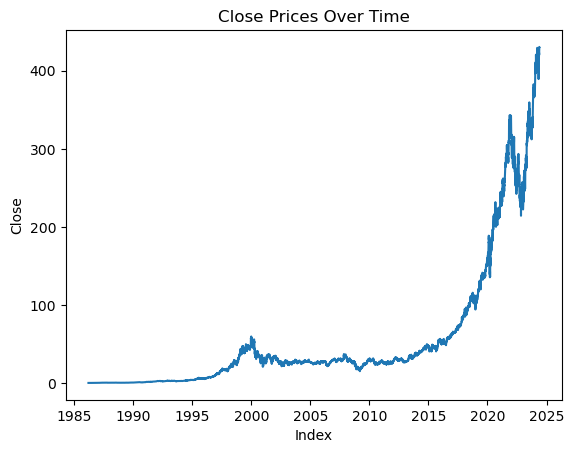

In [11]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Close' is the column you want to plot
plt.plot(df.index, df['Close'])

# Add labels and title if needed
plt.xlabel('Index')
plt.ylabel('Close')
plt.title('Close Prices Over Time')

# Show the plot
plt.show()


In [23]:
import numpy as np
import pandas as pd
import datetime

def str_to_datetime(date_str):
    return datetime.datetime.strptime(date_str, '%Y-%m-%d')

def df_to_windowed_df(dataframe, first_date_str, last_date_str, window_size=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    target_date = first_date
    dates = []
    X, Y = [], []
    last_time = False
    
    while True:
        df_subset = dataframe.loc[:target_date].tail(window_size + 1)
        if len(df_subset) != window_size + 1:
            print(f'Error: Window of size {window_size} is too large for date {target_date}')
            return
        
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)
        
        if last_time:
            break
        target_date = next_date
        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    X = np.array(X)
    for i in range(0, window_size):
        ret_df[f'Target-{window_size - i}'] = X[:, i]
    ret_df['Target'] = Y
    
    return ret_df

# Example usage
windowed_df = df_to_windowed_df(df, '2021-03-25', '2022-03-23', window_size=3)
print(windowed_df)


    Target Date    Target-3    Target-2    Target-1      Target
0    2021-03-25  235.990005  237.580002  235.460007  232.339996
1    2021-03-26  237.580002  235.460007  232.339996  236.479996
2    2021-03-29  235.460007  232.339996  236.479996  235.240005
3    2021-03-30  232.339996  236.479996  235.240005  231.850006
4    2021-03-31  236.479996  235.240005  231.850006  235.770004
..          ...         ...         ...         ...         ...
247  2022-03-17  276.440002  287.149994  294.390015  295.220001
248  2022-03-18  287.149994  294.390015  295.220001  300.429993
249  2022-03-21  294.390015  295.220001  300.429993  299.160004
250  2022-03-22  295.220001  300.429993  299.160004  304.059998
251  2022-03-23  300.429993  299.160004  304.059998  299.489990

[252 rows x 5 columns]


In [24]:
import numpy as np

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)

# Example usage
dates, X, y = windowed_df_to_date_X_y(windowed_df)
print(dates.shape, X.shape, y.shape)


(252,) (252, 3, 1) (252,)


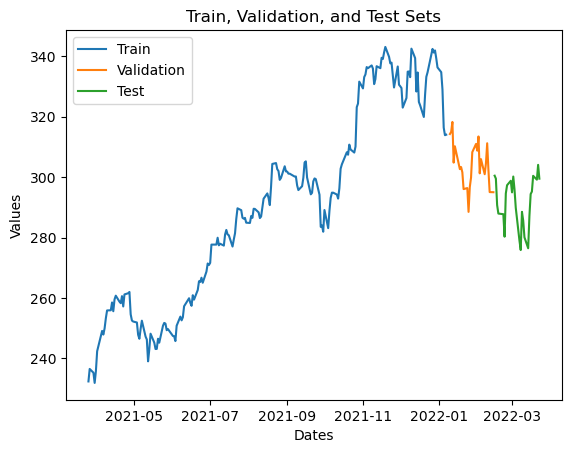

In [26]:
import matplotlib.pyplot as plt

# Assuming dates, X, and y are already defined
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Validation', 'Test'])

plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Train, Validation, and Test Sets')
plt.show()


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001), 
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 296.9000 - mean_absolute_error: 11.2242 - val_loss: 617.1685 - val_mean_absolute_error: 16.4428
Epoch 2/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4998 - mean_absolute_error: 0.3633 - val_loss: 460.2911 - val_mean_absolute_error: 12.9153
Epoch 3/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3197 - mean_absolute_error: 0.3207 - val_loss: 402.4145 - val_mean_absolute_error: 11.6562
Epoch 4/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2909 - mean_absolute_error: 0.3137 - val_loss: 377.1057 - val_mean_absolute_error: 11.2309
Epoch 5/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3221 - mean_absolute_error: 0.3250 - val_loss: 358.5068 - val_mean_absolute_error: 10.6300
Epoch 6/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3173 - mean_absolute_error: 0.3312 - val_loss: 348.2326 - val_mean_absolute_error: 10.4017
Epoch 7/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3112 - mea

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


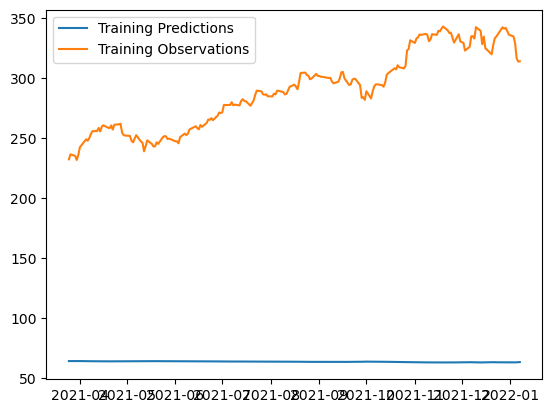

In [28]:
train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


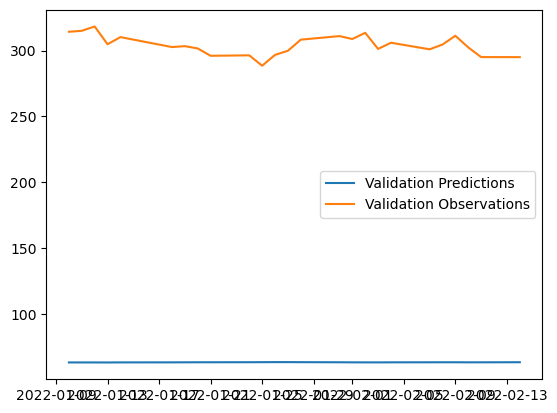

In [29]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

NameError: name 'test_predictions' is not defined

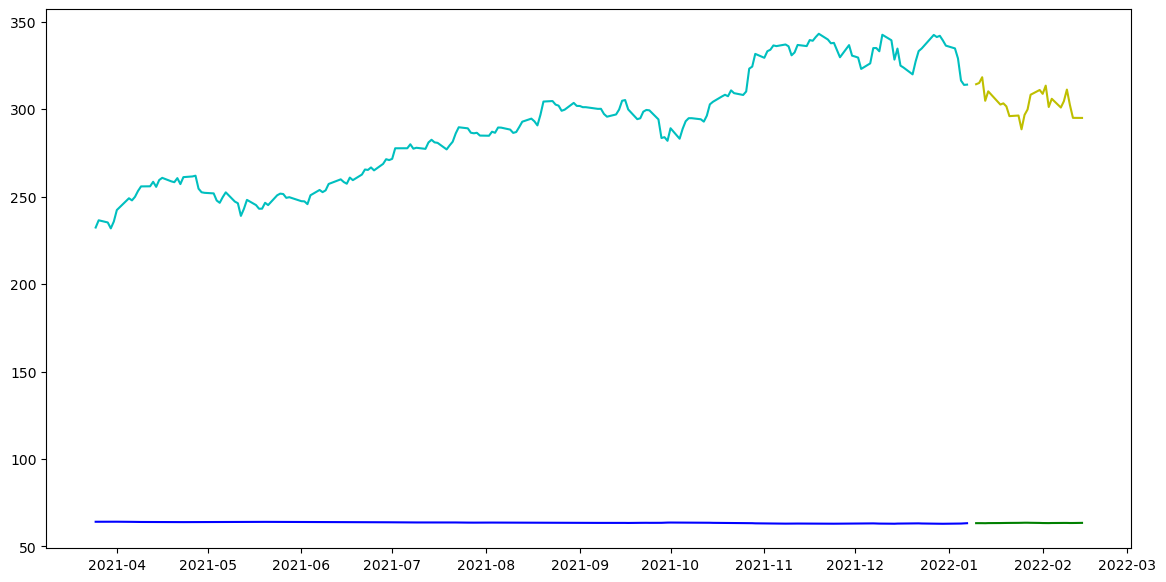

In [31]:
import matplotlib.pyplot as plt

# Assuming train_predictions, y_train, val_predictions, y_val, test_predictions, and y_test are already defined
plt.figure(figsize=(14, 7))

plt.plot(dates_train, train_predictions, 'b', label='Training Predictions')
plt.plot(dates_train, y_train, 'c', label='Training Observations')
plt.plot(dates_val, val_predictions, 'g', label='Validation Predictions')
plt.plot(dates_val, y_val, 'y', label='Validation Observations')
plt.plot(dates_test, test_predictions, 'r', label='Testing Predictions')
plt.plot(dates_test, y_test, 'm', label='Testing Observations')

plt.legend()
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Model Predictions vs Observations')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

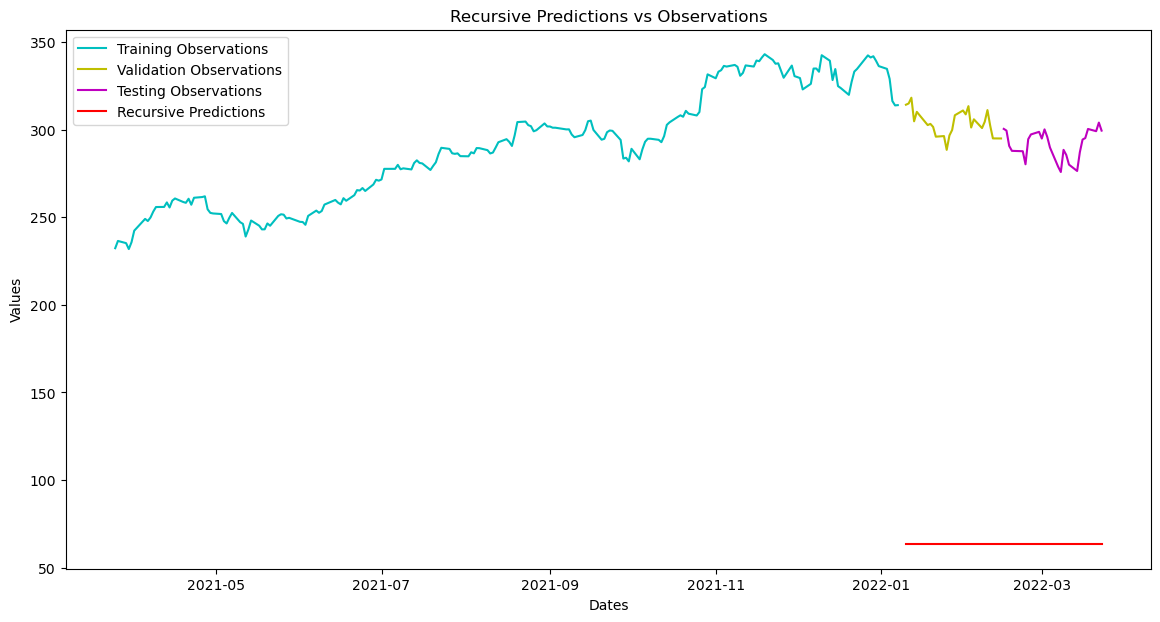

In [33]:
import numpy as np
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.append(last_window[1:], next_prediction)  # Shift the window and add the new prediction

# Flatten the list of predictions
recursive_predictions = np.concatenate(recursive_predictions)

# Plotting the results
plt.figure(figsize=(14, 7))

plt.plot(dates_train, y_train, 'c', label='Training Observations')
plt.plot(dates_val, y_val, 'y', label='Validation Observations')
plt.plot(dates_test, y_test, 'm', label='Testing Observations')
plt.plot(recursive_dates, recursive_predictions, 'r', label='Recursive Predictions')

plt.legend()
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Recursive Predictions vs Observations')
plt.show()


NameError: name 'test_predictions' is not defined

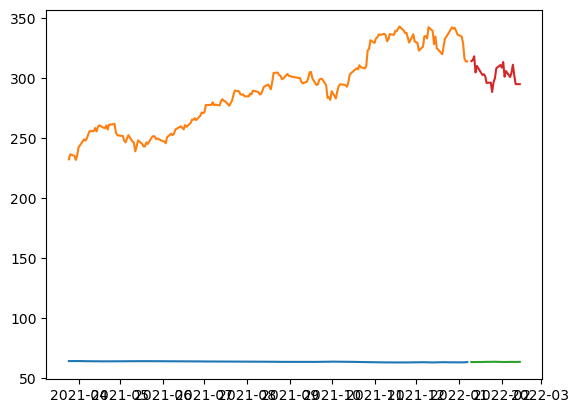

In [34]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions'
'Training Observations',
'Validation Predictions',
'Validation Observations',
'Testing Predictions',
'Testing Observations',
'Recursive Predictions'])